### Load Libraries and data from previous step

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

In [2]:
data_encoded = pd.read_csv('data_encoded.csv')
data_new = pd.read_csv('data_new.csv')
data = pd.read_csv('data.csv')

In [17]:
df_Num= data[['NumDealsPurchases',
            'NumWebPurchases',
            'NumCatalogPurchases', 
            'NumStorePurchases' , 
            'NumWebVisitsMonth']]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Plots

## 1. Products and channels

### Categories

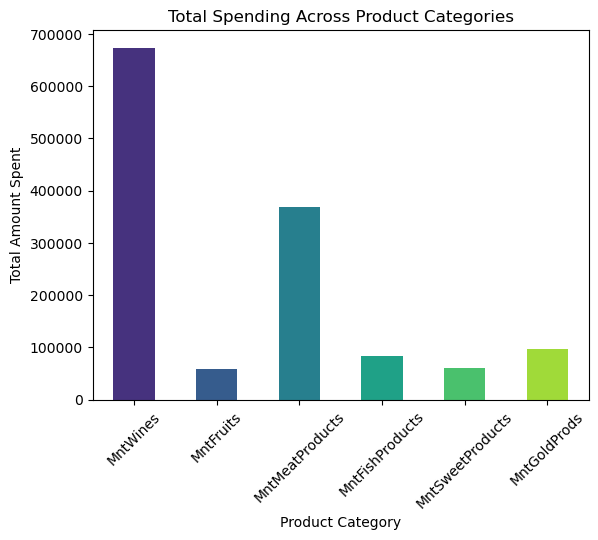

In [3]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = data_new[spending_columns].sum()

total_spending.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Total Spending Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

### Recency

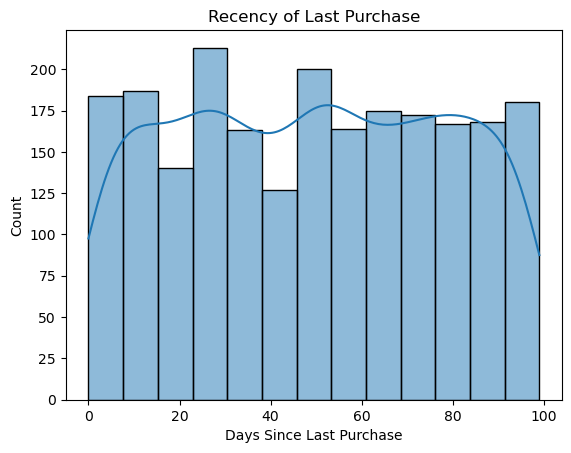

In [4]:
sns.histplot(data['Recency'], kde=True)
plt.title('Recency of Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Count')
plt.show()

### Customer behaviors and web engagement

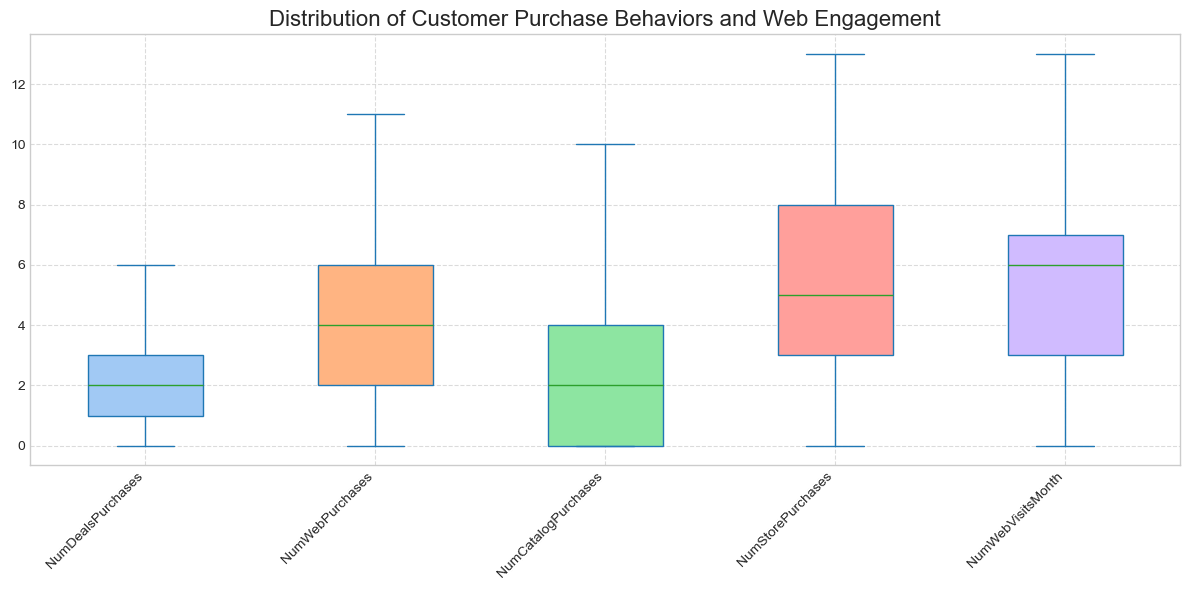

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

df_Num.plot(kind='box', ax=ax, showfliers=False, patch_artist=True)

ax.set_title("Distribution of Customer Purchase Behaviors and Web Engagement"
, fontsize=16)

plt.xticks(rotation=45, ha='right')

ax.grid(True, linestyle='--', alpha=0.7)

colors = sns.color_palette('pastel')
for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()

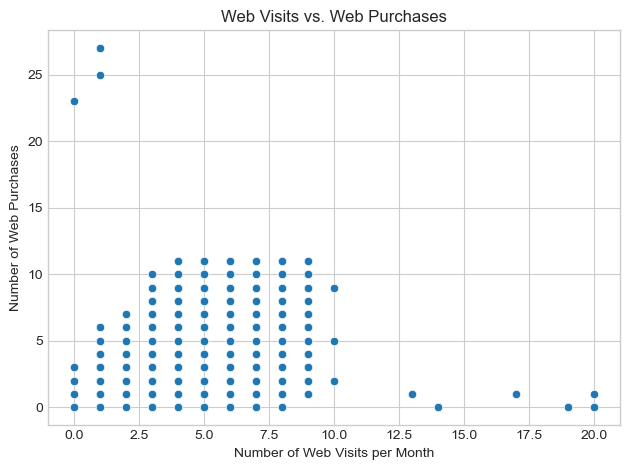

In [21]:
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data)
plt.title('Web Visits vs. Web Purchases')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases')
plt.tight_layout()
plt.show()

## 2. Customers

### Age and income

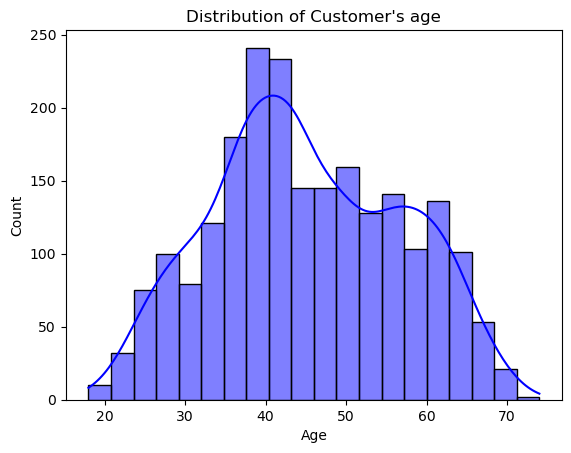

In [6]:
sns.histplot(data_new['Age'], kde=True, bins=20, color='blue')
plt.title("Distribution of Customer's age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

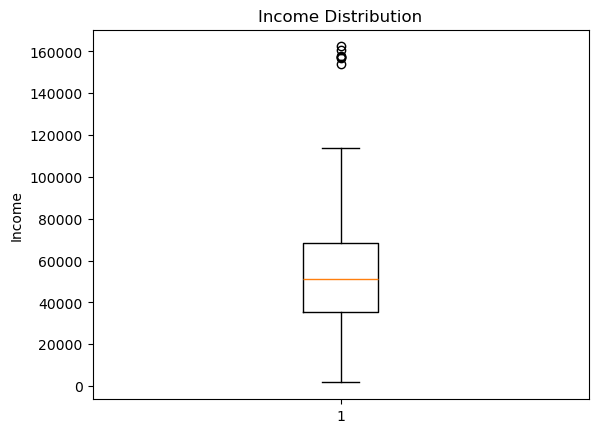

In [7]:
plt.boxplot(data_new['Income'])
plt.title('Income Distribution')
plt.ylabel('Income')
plt.show()

### Education

C:\Users\Nik\AppData\Local\Temp\ipykernel_8648\2281090451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='muted')


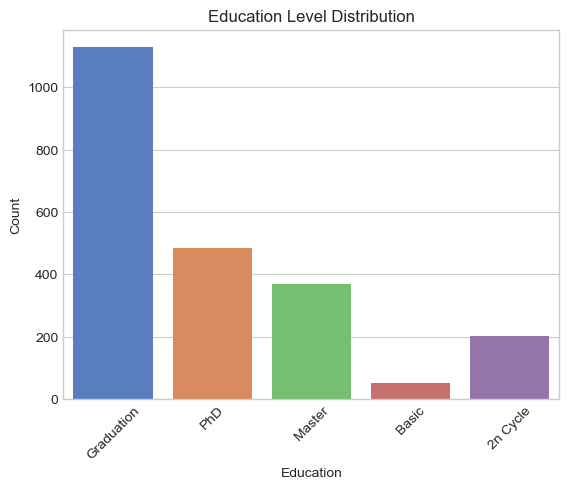

In [42]:
sns.countplot(x='Education', data=data, palette='muted')
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

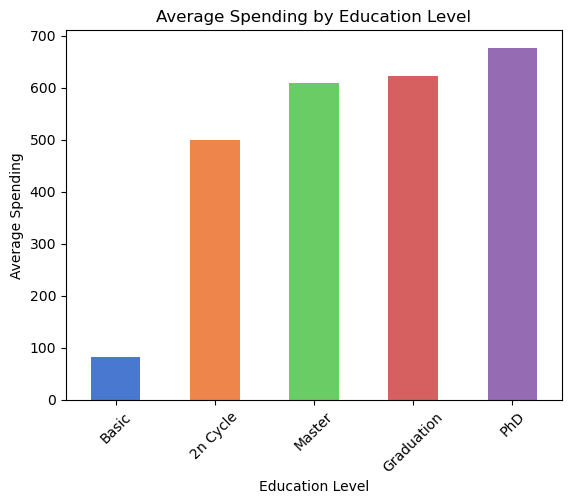

In [9]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

# Group by education and calculate total spending
education_spending = data_new.groupby('Education')['Total_Spending'].mean().sort_values()

# Plot the spending by education level
education_spending.plot(kind='bar', color=sns.color_palette('muted'))

plt.title('Average Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

### Marital Status

C:\Users\Nik\AppData\Local\Temp\ipykernel_8648\606001067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=data_new, palette='viridis')


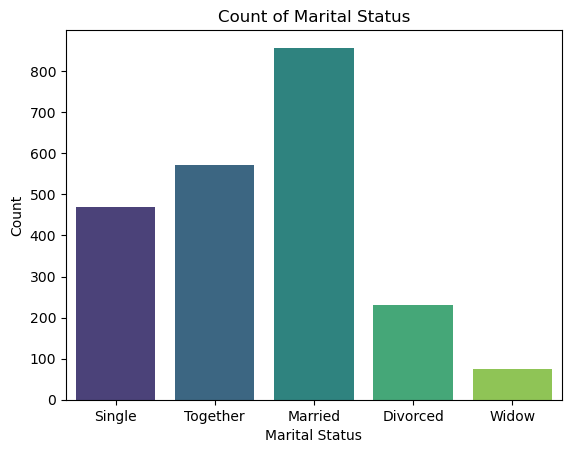

In [10]:
sns.countplot(x='Marital_Status', data=data_new, palette='viridis')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

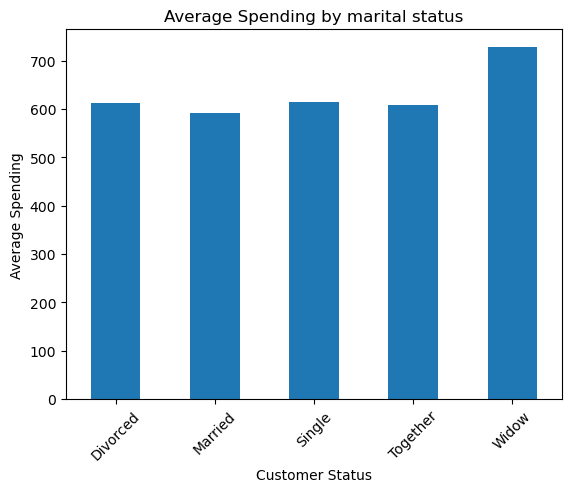

In [11]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Marital_Status')['Total_Spending'].mean()

kids_spending.plot(kind='bar')

plt.title('Average Spending by marital status')
plt.xlabel('Customer Status')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

### Dependants

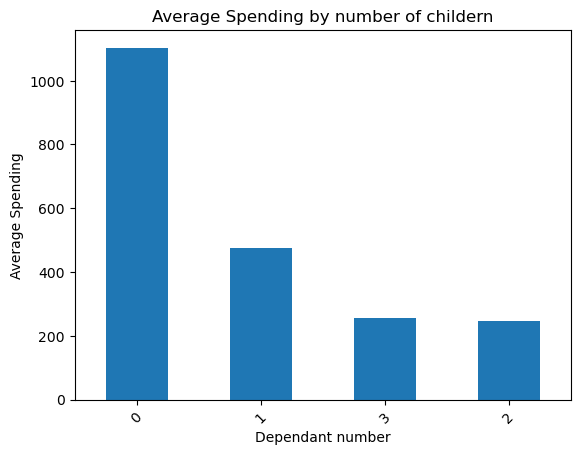

In [12]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Dependants')['Total_Spending'].mean().sort_values(ascending=False)

kids_spending.plot(kind='bar')

plt.title('Average Spending by number of childern')
plt.xlabel('Dependant number')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

### Dependants (Teens vs Small kids)

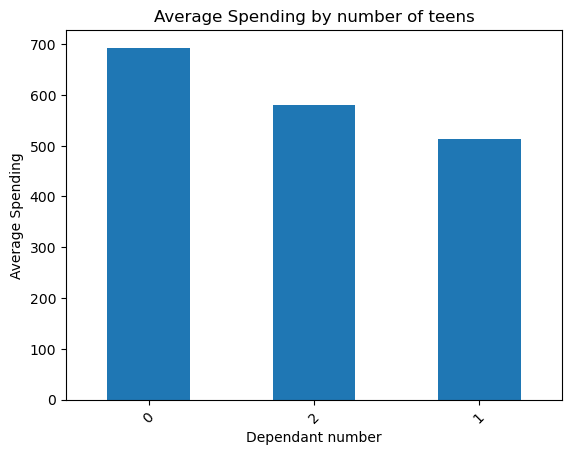

In [13]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Teenhome')['Total_Spending'].mean().sort_values(ascending=False)

kids_spending.plot(kind='bar')

plt.title('Average Spending by number of teens')
plt.xlabel('Dependant number')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

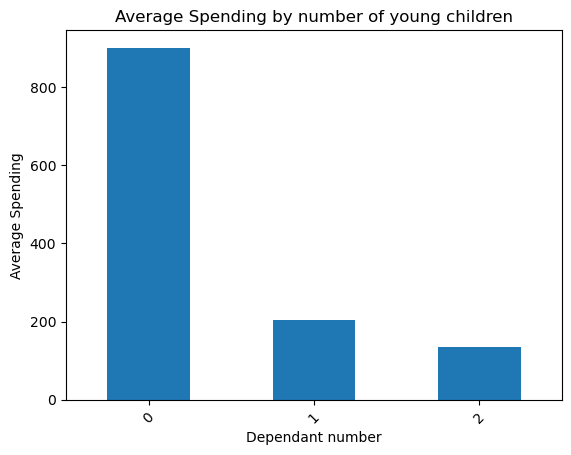

In [14]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Kidhome')['Total_Spending'].mean().sort_values(ascending=False)

kids_spending.plot(kind='bar')

plt.title('Average Spending by number of young children')
plt.xlabel('Dependant number')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

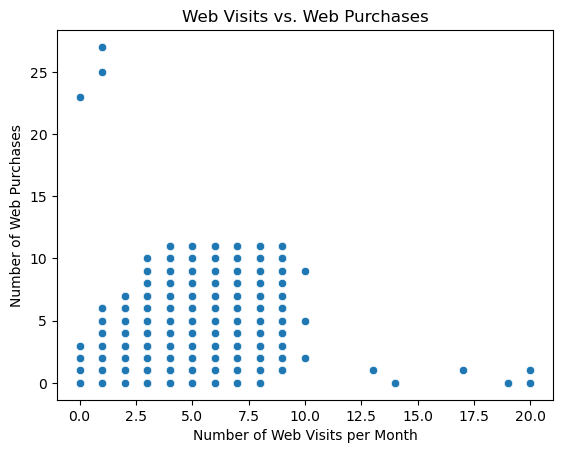

In [15]:
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data)
plt.title('Web Visits vs. Web Purchases')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases')
plt.show()

### Campaigns and last purchase

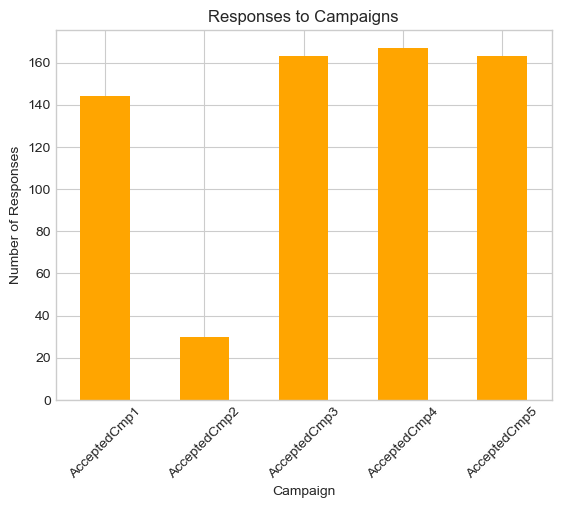

In [47]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_responses = data[campaign_columns].sum()

campaign_responses.plot(kind='bar', color='orange')
plt.title('Responses to Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.show()

# Extra plots

### Correletion matrix

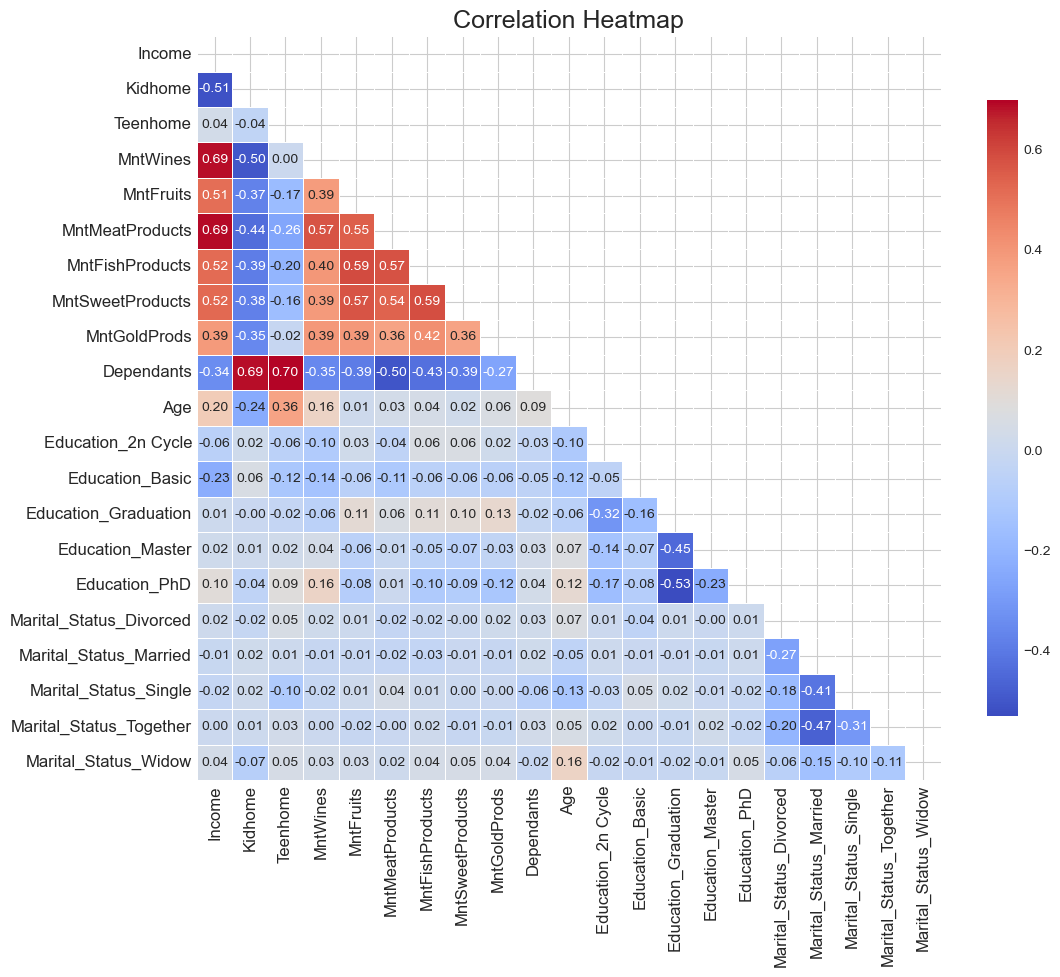

In [43]:
# Create correlation matrix
corr_matrix = data_encoded.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": .8}, square=True)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()